In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate1 as sr1
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import sample as sm
import hr_full as hr
import hr_restrict as hrr
# warnings.filterwarnings('ignore')

In [2]:
D, D_r = 3, 2048
Lyapunov_time, dt = 1./.91, 0.02
error_threshold = 0.05
beta = 1e-11
L0, L1 = 0.4, 3.5
percents = 50
n_repeats = 100
error_threshold = 0.05
L63_data_folder = '../data/L63-trajectories'
train = np.load('{}/validation.npy'.format(L63_data_folder))
test = np.load('{}/test.npy'.format(L63_data_folder))[:, :1000, :]
save_folder = f'../data/small-beta/{D_r}'
batch = sr1.BatchStrategy_SMLR(save_folder, D, D_r, n_repeats, beta, error_threshold, train, test, dt=0.02, Lyapunov_time=1./0.91,\
                 L0=0.4, L1=3.5, percents=percents, row_selection='good_linear_extreme', train_option='random_20000',\
                 limits_W_in=[-0.1, 0.1], limits_W=[-1., 1.])
# batch.run(save_data=True)

Text(0, 0.5, '$\\mathbb{E}[\\mathcal{N}^0]$')

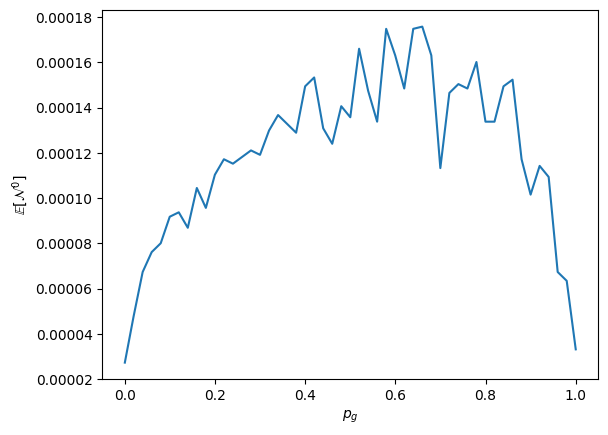

In [3]:
bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folder)
N0 = bsa.get_line('0_cols_W')[0] 
plt.plot(bsa.percents, N0)
plt.xlabel(r'$p_g$')
plt.ylabel(r'$\mathbb{E}[\mathcal{N}^0]$')

In [4]:
0.00018*2048

0.36864

In [5]:
W_in = np.load(f'{save_folder}/W_in/W_in_0.npy')

In [6]:
np.linalg.norm(W_in)

3.0481634845967007

In [13]:
N0 = []
for i in range(51*500):
    W = np.load(f'{save_folder}/W/W_{i}.npy')
    N0.append((np.max(np.abs(W), axis=0) < 1).sum())

In [16]:
N0 = np.array(N0).reshape(51, 500)
EN0 = np.mean(N0, axis=1)

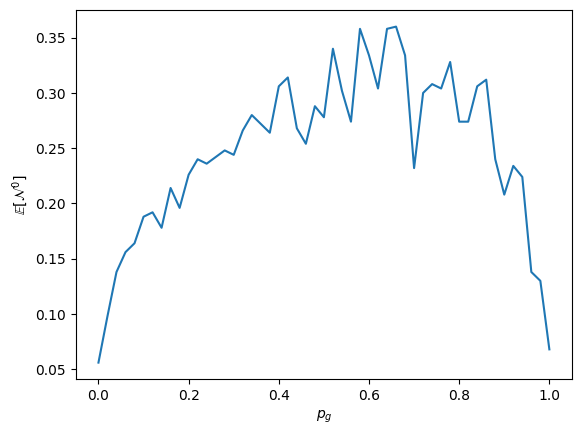

In [20]:
plt.plot(np.arange(51)/50, EN0)
plt.xlabel(r'$p_g$')
plt.ylabel(r'$\mathbb{E}[\mathcal{N}^0]$')
plt.savefig(f'{save_folder}/zero-cols.png')

In [25]:
save_folder1 = '../data/L63-Strategy-varying-featuresize/2048'
N0g, k = [], 0
for i in range(51):
    for j in range(500):
        W = np.load(f'{save_folder}/W/W_{k}.npy')
        Ng = int(2048*i*0.02)+1
        Wg = W[:,:Ng]
        N0g.append((np.max(np.abs(Wg), axis=0) < 1).sum())
        k += 1

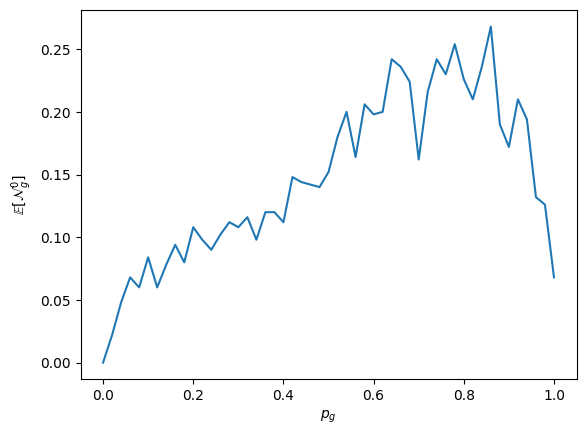

In [26]:
N0g = np.array(N0g).reshape(51, 500)
EN0g = np.mean(N0g, axis=1)
plt.plot(np.arange(51)/50, EN0g)
plt.xlabel(r'$p_g$')
plt.ylabel(r'$\mathbb{E}[\mathcal{N}^0_g]$')
plt.savefig(f'{save_folder}/zero-cols-g.png')